In [1]:
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.common.exceptions import NoSuchElementException
from selenium import webdriver

from IPython.display import display, Image

from collections import deque
from graphviz import Digraph

In [7]:
options = Options()
options.headless = True # don't use a GUI (necessary on a VM)
service = Service(executable_path="chromium.chromedriver")
b = webdriver.Chrome(options=options, service=service)

### page1.html: Javascript table example

### Selenium operations

- Operations:
    - `b.get(URL)`: sends HTTP GET request to the URL
    - `b.page_source`: HTML source for the page
    - `b.find_elements("id", <ID>)`: searches for a specific element that matches the "id"
    - `b.find_elements("tag name", <TAG>)`: searches for a specific element using corresponding tag name
    - `b.find_element` versus `b.find_elements`:
        - `find_element` gives first match
        - `find_elements` gives all matches
    - `<element obj>.text`: gives text associated with that element

### POLLING: How would we know when the updated page becomes available?
- keep checking regularly until you get all the details you are looking for.

In [12]:
url = "https://www.msyamkumar.com/cs320/tricky/page1.html"
b.get(url)

while True:
    tbls = b.find_elements("tag name", "table")
    print("Tables:", len(tbls))
        
    if len(tbls) == 2:
        print(tbls)
        break
    
    time.sleep(0.1) # sleep for 0.1 second

Tables: 1
Tables: 1
Tables: 1
Tables: 1
Tables: 1
Tables: 1
Tables: 1
Tables: 1
Tables: 1
Tables: 2
[<selenium.webdriver.remote.webelement.WebElement (session="1a03600a85216746da0e9dd0ca36b740", element="0f0981b8-ba02-4d8c-806e-bff0aa63f4ac")>, <selenium.webdriver.remote.webelement.WebElement (session="1a03600a85216746da0e9dd0ca36b740", element="44fa841f-24ed-4a41-8ae4-14fe56ae93a5")>]


### Let's extract the 2nd table information

In [14]:
tbl = tbls[-1]

# TODO: find all tr elements
trs = tbl.find_elements("tag name", "tr")

# TODO: find all td elements
# TODO: extract text for all td elements into a list of list
rows = []

for tr in trs:
    tds = tr.find_elements("tag name", "td")
    assert len(tds) == 2
    rows.append([tds[0].text, tds[1].text])
    
rows

[['x', 'y'],
 ['0', '1'],
 ['2', '3'],
 ['4', '5'],
 ['6', '7'],
 ['8', '9'],
 ['10', '11'],
 ['12', '13'],
 ['14', '15'],
 ['16', '17'],
 ['18', '19']]

### Converting `rows` into a `DataFrame`

In [15]:
pd.DataFrame(rows[1:], columns=rows[0])

,x,y
0,0,1
1,2,3
2,4,5
3,6,7
4,8,9
5,10,11
6,12,13
7,14,15
8,16,17
9,18,19


### How can we visually see the page on the VM?

- Operations:
    - `b.save_screenshot("some_file.png")`: saves a screenshot of the rendered page
    - `b.set_window_size(<width>, <height>)`: controls size of the image
    - import statement: `from IPython.display import display, Image`: helps us show the screenshot as an image inside the notebook

In [16]:
b.save_screenshot("page1.png")

True

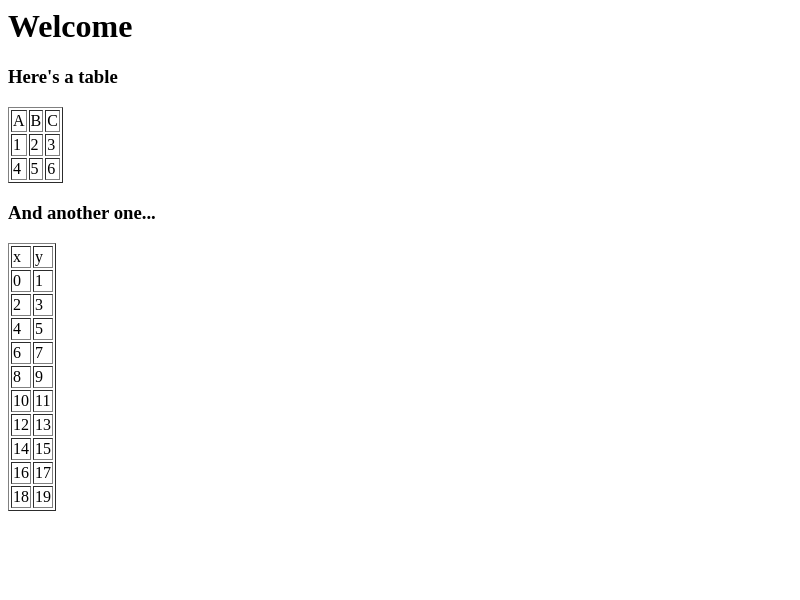

In [17]:
b.set_window_size(300, 200)
display(Image("page1.png"))

### Combining taking screenshot and displaying it
- useful for p3

In [18]:
def show_screen(width, height):
    b.save_screenshot("out.png")
    b.set_window_size(width, height)
    display(Image("out.png"))

### page2.html: "Show More!" button example

- Operations:
    `button_oject.click()`: enables us to click the button

In [19]:
url = "https://www.msyamkumar.com/cs320/tricky/page2.html"
b.get(url)

In [20]:
# TODO: find the id for the more button (inspect element on browser)
button = b.find_element("id", "more")

In [21]:
# TODO: click the button
button.click() 
# keep running this cell reptitively
# once all data is retrieved, we will run into NoSuchElementException

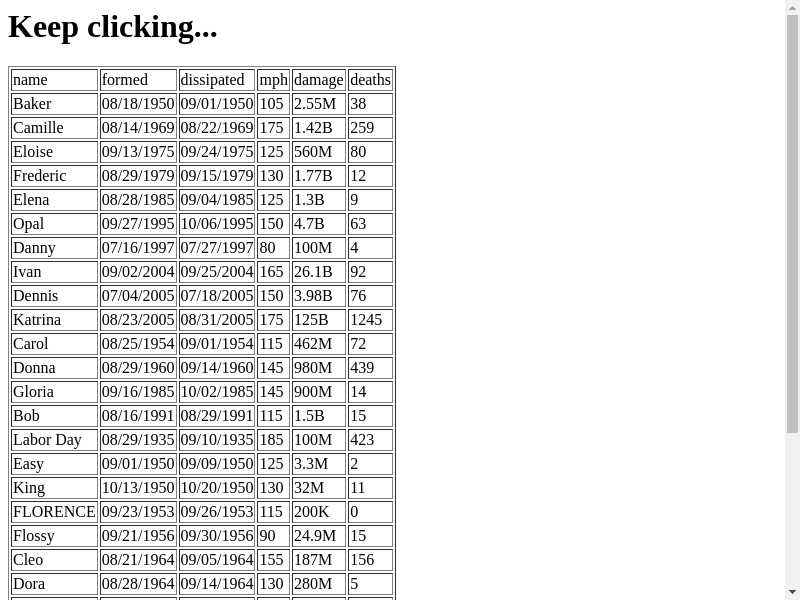

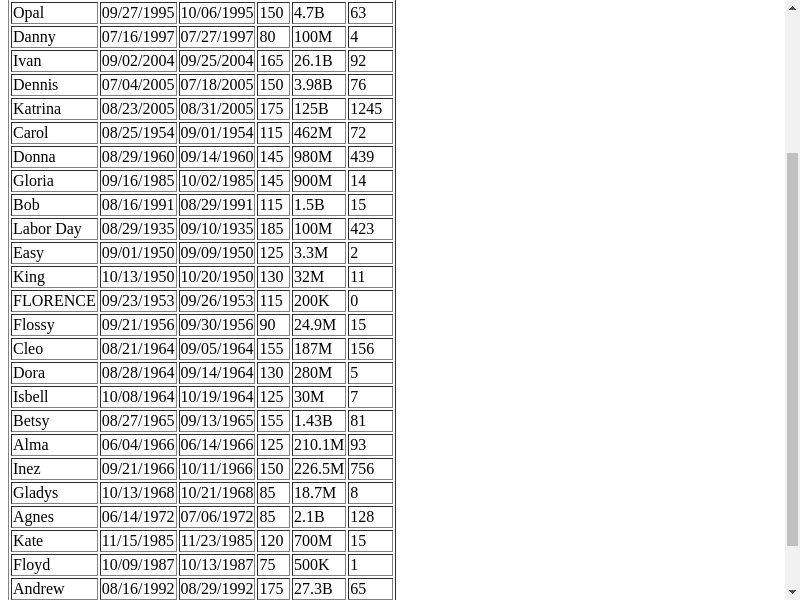

We have all the data!


In [22]:
while True:
    try:
        button = b.find_element("id", "more")
        button.click()
        show_screen(300, 200)
        print("============================================================")
    except NoSuchElementException:
        print("We have all the data!")
        break
    time.sleep(1)

In [23]:
print(b.page_source)

<html><head>
    <script src="https://code.jquery.com/jquery-3.4.1.js"></script>
    <script>
      var lines = [];

      function show() {
        tbl = document.getElementById("hurricanes");
        count = Math.min(10, lines.length);
        for (i=0; i<count; i++) {
          var tr = document.createElement("tr");
          tr.innerHTML = "<td>"+lines[i].replace(/,/g, "</td><td>")+"</td>";
          tbl.appendChild(tr);
        }
        lines = lines.slice(count);
        if (lines.length == 0) {
          document.getElementById("more").remove();
        }
      }

      function main() {
        fetch('hurricanes.csv')
          .then(response => response.text())
          .then(data => {
            console.log(data);
            lines = data.split("\n");
            show();
          })
      }
      </script>
  </head>
  <body onload="main()">
    <h1>Keep clicking...</h1>

    <table id="hurricanes" border="1"><tr><td>name</td><td>formed</td><td>dissipated</td><td>mph</td><

### page 3: password protection example

- Operations:
    `text_object.send_keys()`: enables us to send data to textbox

In [24]:
url = "https://www.msyamkumar.com/cs320/tricky/page3.html"
b.get(url)

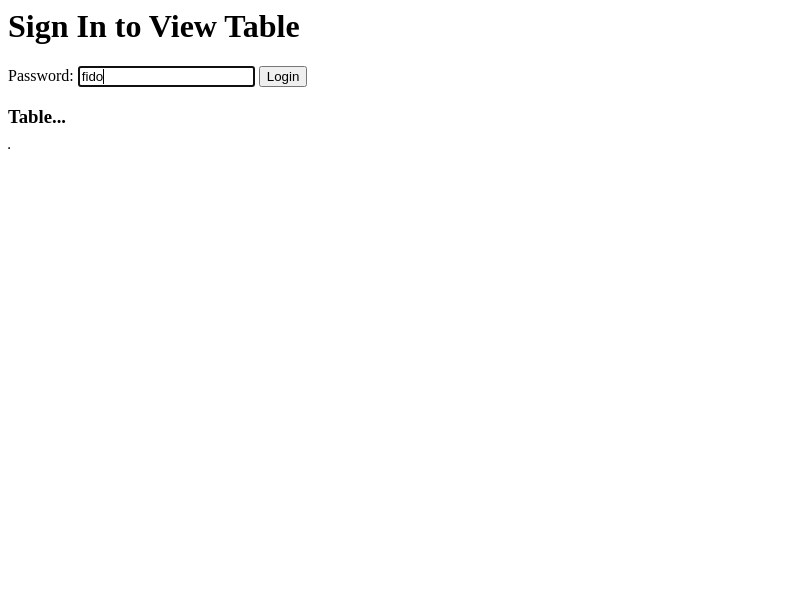

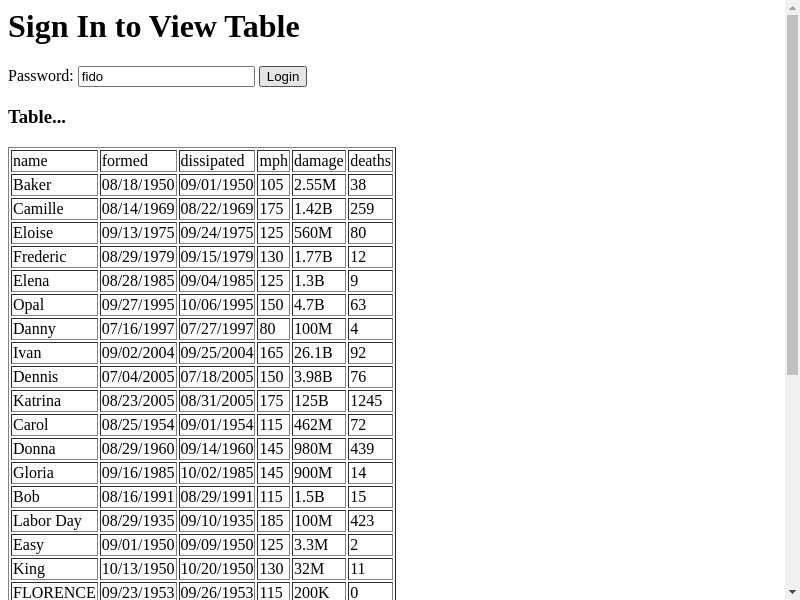

In [25]:
# TODO: find the id for password box (inspect element on browser)
# TODO: find the id for the login button (inspect element on browser)
text = b.find_element("id", "password")
button = b.find_element("id", "login_btn")

# TODO: send the password (plain text just for example purposes)
text.send_keys("fido")
show_screen(300, 200)

# TODO: click the button
button.click()
show_screen(300, 200)

In [26]:
print(b.page_source)

<html><head>
    <script src="https://code.jquery.com/jquery-3.4.1.js"></script>
    <script>
      var lines = [];

      function login() {
        if (document.getElementById("password").value != "fido") {
          alert("sorry, password != 'fido'")
          return;
        }

        fetch('hurricanes.csv')
          .then(response => response.text())
          .then(data => {
            console.log(data);
            lines = data.split("\n");
            show();
          })
        }

      function show() {
        tbl = document.getElementById("hurricanes");
        tbl.innerHTML = "";
        for (i=0; i<lines.length; i++) {
          var tr = document.createElement("tr");
          tr.innerHTML = "<td>"+lines[i].replace(/,/g, "</td><td>")+"</td>";
          tbl.appendChild(tr);
        }
      }
      </script>
  </head>
  <body>
    <h1>Sign In to View Table</h1>

    Password: <input id="password">
    <button id="login_btn" onclick="login()">Login</button>

    <h3>Tabl

### page 4: search data for a year

- Operations:
    `text_object.clear()`: enables us to clear the previous text

In [27]:
url = "https://www.msyamkumar.com/cs320/tricky/page4.html"
b.get(url)

In [28]:
# TODO: find the id for year box (inspect element on browser)
# TODO: find the id for the search button (inspect element on browser)
text = b.find_element("id", "year")
button = b.find_element("id", "search_btn")

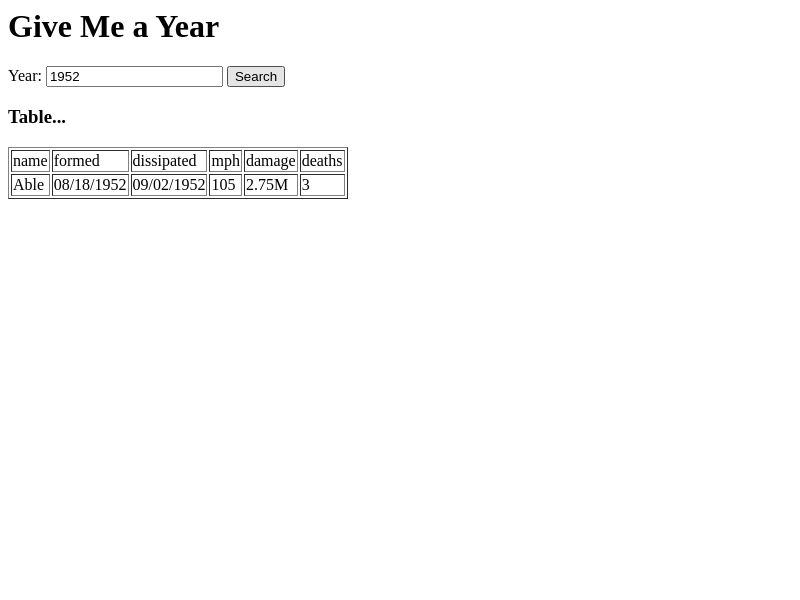

In [29]:
text.clear()
text.send_keys("1952")
button.click()
show_screen(300, 200)

#### How many hurricanes were there each year?

Text(0, 0.5, 'Hurricane count')

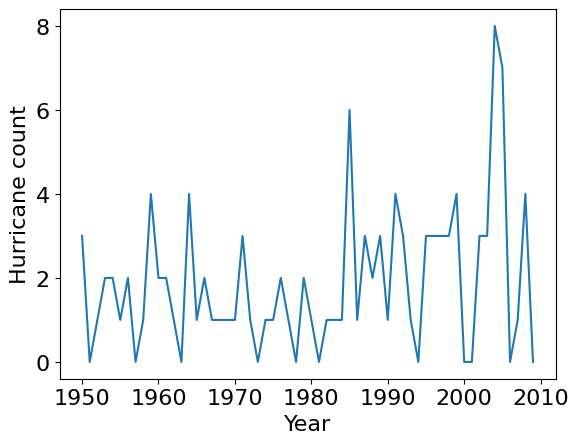

In [30]:
hurricane_counts = pd.Series(dtype=float)

for year in range(1950, 2010):
    text.clear()
    text.send_keys(str(year))
    button.click()
    # show_screen(300, 200)
    
    # TODO: find all tr elements and count hurricanes for each year
    trs = b.find_elements("tag name", "tr")
    
    # TODO: We have to subtract 1 for removing header tr element
    count = len(trs) - 1
    
    hurricane_counts.loc[year] = count
    
ax = hurricane_counts.plot.line()
ax.set_xlabel("Year")
ax.set_ylabel("Hurricane count")

# Web 2: Recursive Crawl

- crawling: process of finding all the webpages inside a website

In [ ]:
# TODO: initialize url, send GET request, and display page source
url = "https://tyler.caraza-harter.com/cs320/crawl/practice1/1.html"
b.get(url)
print(b.page_source)

In [ ]:
# TODO: show the screen
show_screen(300, 200)

### Final all hyperlinks

- Selenium operations:
    - `b.get(URL)`: sends HTTP GET request to the URL
    - `b.page_source`: HTML source for the page
    - `b.find_elements("id", <ID>)`: searches for a specific element that matches the "id"
    - `b.find_elements("tag name", <TAG>)`: searches for a specific element using corresponding tag name
    - `b.find_element` versus `b.find_elements`:
        - `find_element` gives first match
        - `find_elements` gives all matches
    - `<element obj>.text`: gives text associated with that element   
    - `<element obj>.get_attribute(<attribute>)`: gives attribute value; for ex: `<anchor_obj>.get_attribute("href")`
    
    - `b.save_screenshot("some_file.png")`: saves a screenshot of the rendered page
    - `b.set_window_size(<width>, <height>)`: controls size of the image
    - import statement: `from IPython.display import display, Image`: helps us show the screenshot as an image inside the notebook
    - `button_oject.click()`: enables us to click the button
    - `text_object.send_keys()`: enables us to send data to textbox

In [ ]:
a_elements = b.find_elements("tag name", "a")
for a_element in a_elements:
    print(a_element.text, a_element.get_attribute("href"))

In [ ]:
# TODO: Generalize to a function
def get_children(url):
    """
    Finds all hyperlinks in the given url by sending GET request and parsing page source.
    Returns a list of children URLs.
    """
    b.get(url)
    children = []
    for a_element in b.find_elements("tag name", "a"):
        children.append(a_element.get_attribute("href"))
    return children

url = "https://tyler.caraza-harter.com/cs320/crawl/practice1/1.html"
get_children(url)

### Breadth First Search

- for crawling, there is no specific "destination", as we need to find all the webpages.

In [ ]:
start_url = "https://tyler.caraza-harter.com/cs320/crawl/practice1/1.html"
#start_url = "https://tyler.caraza-harter.com/cs320/crawl/practice7/1.html"

to_visit = deque([start_url])
added = {start_url} # Why use a set to keep track of visited nodes?

# TODO: create a Digraph
g = Digraph()

while len(to_visit) > 0: 
    curr_node = todo_queue.popleft()
    print("CURR:", curr_node)
    
    # TODO: add current node to digraph
    gv.node(curr_node.split("/")[-1])
    
    # TODO: how do we get all the children?
    children = get_children(curr_node)
    
    #show_screen(300, 200)
    
    for child in children:
        # TODO: add an edge
        gv.edge(curr_node.split("/")[-1], child.split("/")[-1])
        
        if not (child in added):
            todo_queue.append(child)
            added.add(child)
            
    print("TO VISIT:", to_visit)
    
g